<a href="https://colab.research.google.com/github/harshithasmj/LiverPatientAnalysis/blob/main/ILPD_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**
Indian Liver Patient Dataset (ILPD) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/). Perform feature engineering, data preprocessing, dimensionality reduction, and logistic regression to predict whether a patient has liver disease.

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
pd.set_option('display.max_columns', None)

ImportError: initialization failed

## **Description of the Dataset**


* The ILPD comprises 583 patient records with 10 biochemical/demographic features and a target feature that are listed below:

The dataset has the following columns:

- `Age` (Integer): Patient's age.
- `Gender` (Categorical: Male/Female).
- `TB` (Total Bilirubin, Continuous).
- `DB` (Direct Bilirubin, Continuous).
- `Alkphos` (Alkaline Phosphotase, Integer).
- `Sgpt` (Alamine Aminotransferase, Integer).
- `Sgot` (Aspartate Aminotransferase, Integer).
- `TP` (Total Proteins, Continuous).
- `ALB` (Albumin, Continuous).
- `A/G Ratio` (Albumin and Globulin Ratio, Continuous).
- `Selector` (Binary: 1 = Liver patient, 2 = Non-liver patient)

### **Import libraries, Load the Dataset, and Create a Header**


In [ ]:

column_names = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Selector']
df = pd.read_csv("ILPD.csv", names = column_names)
df['Target'] = df['Selector'].apply(lambda x:1 if x == 1 else 0)

df = df.drop(columns=['Selector'])

column_namesnew = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio', 'Target']
df.columns = column_namesnew
df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


### **Identify columns with missing data (if any) and then determine an appropriate strategy for each**



In [ ]:
before_NA = df.isnull().sum()

numerical = ['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'A/G Ratio']
df[numerical] = df[numerical].fillna(df[numerical].median())


df['Gender'].fillna(df['Gender'].mode())
df['Gender'].fillna(df['Gender'].mode())

after_NA = df.isnull().sum()

In [ ]:



assert after_NA.sum() == 0, "Check for missing values."


print("No missing values.")





No missing values.


### **One-hot Encoding for Categorical Variables**



In [ ]:


df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df


<ipython-input-29-aabfa18471b2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


### **Feature Extraction**



In [ ]:

df['Bilirubin Ratio'] = df['DB'] / df['TB']
df['ALT/AST Ratio'] = df['Sgpt'] / df['Sgot']


### **Standardization**



In [ ]:


scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
df.head()


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target,Bilirubin Ratio,ALT/AST Ratio,age_ord,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior
0,1.252098,0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147529,1,0.142857,0.888889,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
1,1.066637,1,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650323,1,0.504587,0.640000,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
2,1.066637,1,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178953,1,0.561644,0.882353,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
3,0.819356,1,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166718,1,0.400000,0.700000,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False
4,1.684839,1,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.718760,1,0.512821,0.457627,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False


### **Engineering Ordinal Features**

In [ ]:

age_min = df['Age'].min()
age_max = df['Age'].max()


age_bins = sorted(set([age_min, 30, 50, age_max]))
age_labels = ['Young', 'Middle-Aged', 'Senior']


if len(age_bins) < 3:
    age_bins = [age_min, (age_min + age_max) / 2, age_max]
    age_labels = ['Young', 'Senior']


df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels = age_labels, include_lowest = True)
df['age_ord'] = df['age_group'].apply(lambda x:1 if x == 'Young' else (2 if x == 'Middle-Aged' else 3))
df['age_ord'].fillna(df['age_ord'].mode())
df['Age'].fillna(df['Age'].median())
# Map ordinal categories
# Display first few rows
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Target,Bilirubin Ratio,ALT/AST Ratio,age_ord,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group_Young,age_group_Middle-Aged,age_group_Senior,age_group
0,1.252098,0,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147529,1,0.142857,0.888889,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,Young
1,1.066637,1,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650323,1,0.504587,0.640000,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,Young
2,1.066637,1,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178953,1,0.561644,0.882353,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,Young
3,0.819356,1,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166718,1,0.400000,0.700000,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,Young
4,1.684839,1,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.718760,1,0.512821,0.457627,1,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,Young


### **Dimensionality Reduction**

In [ ]:



num_df = df.drop(columns=['Target', 'Gender', 'age_group', 'age_ord'])
X = num_df
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)
accuracy_bef= accuracy_score(y_test, y_pred_before)
print("Accuracy before:", accuracy_bef)

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model.fit(X_train_pca, y_train)
y_pred_after_4 = model.predict(X_test_pca)
accuracy_after_4 = accuracy_score(y_test, y_pred_after_4)
print("Accuracy after:", accuracy_after_4)

pca = PCA(n_components=2)
X_train_pca_2 = pca.fit_transform(X_train)
X_test_pca_2 = pca.transform(X_test)

model.fit(X_train_pca_2, y_train)
y_pred_after_2 = model.predict(X_test_pca_2)
accuracy_after_2 = accuracy_score(y_test, y_pred_after_2)
print("Accuracy after:",accuracy_after_2)



Accuracy before: 0.7521367521367521
Accuracy after: 0.717948717948718
Accuracy after: 0.717948717948718


## **Logistic Regression Model**

* Train a logistic regression model using the processed dataset.


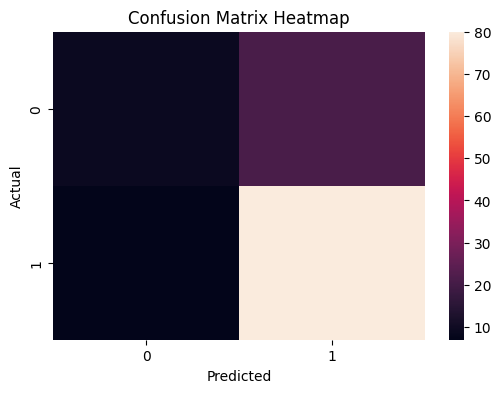

Accuracy: 0.7606837606837606
Confusion Matrix:
 [[ 9 21]
 [ 7 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.30      0.39        30
           1       0.79      0.92      0.85        87

    accuracy                           0.76       117
   macro avg       0.68      0.61      0.62       117
weighted avg       0.73      0.76      0.73       117



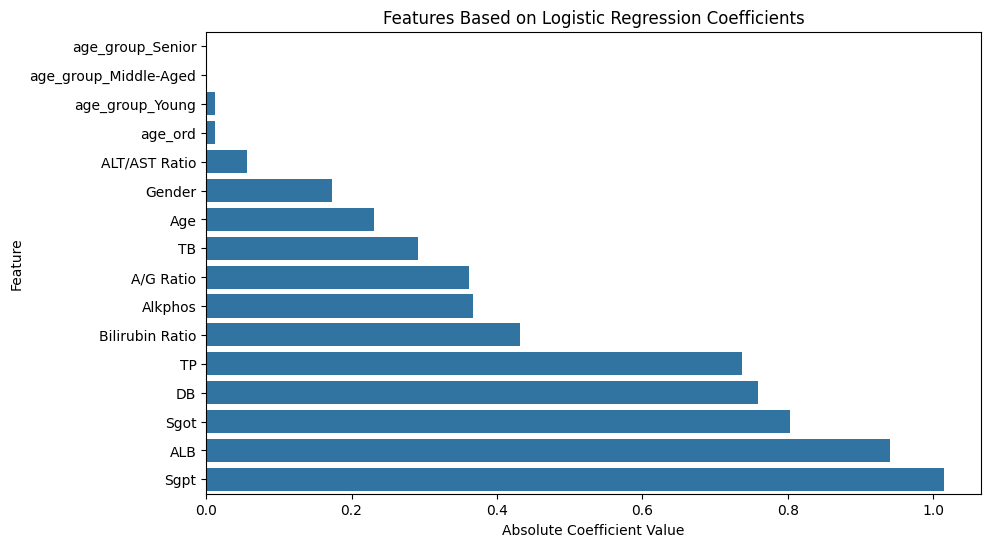

In [ ]:

df = pd.get_dummies(df, columns=['age_group'])

X = df.drop(columns=['Target'])
y1 = df['Target']

X_train, X_test, y_train, y = train_test_split(X, y1, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

heatmap = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(heatmap)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()
# Evaluate model
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


#coeffients
feature = X.columns
coefficient = model.coef_[0]
coefdf = pd.DataFrame({'Feature': feature, 'Coefficient': coefficient})
coefdf['Abs_Coefficient'] =  coefdf['Coefficient'].abs()
coefdf = coefdf.sort_values(by='Abs_Coefficient')


plt.figure(figsize=(10,6))
sns.barplot(x='Abs_Coefficient', y='Feature', data = coefdf)
plt.title("Features Based on Logistic Regression Coefficients")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.show()


## **Visualisation**
* Plot the distribution of Total Bilirubin (TB) for liver and non-liver patients.



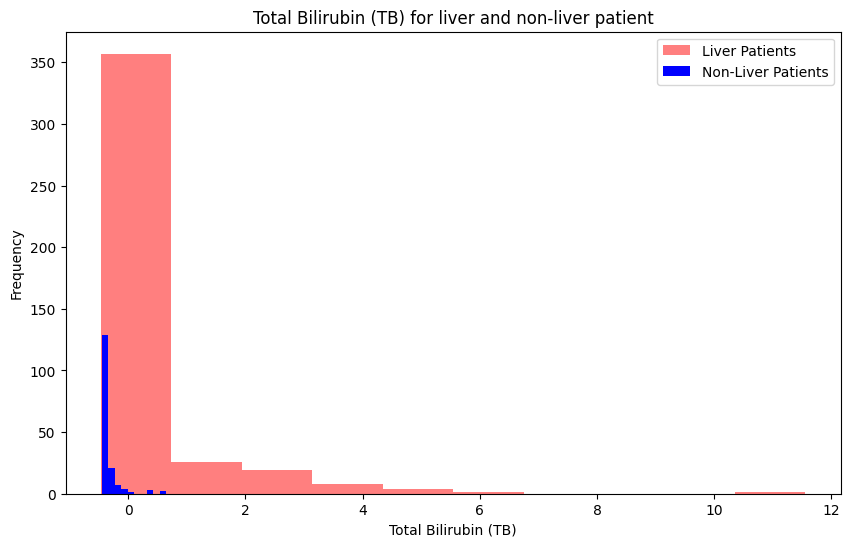

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

liver_patients = df[df['Target'] == 1]
non_liver_patients = df[df['Target'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(liver_patients['TB'], color='red', label='Liver Patients', alpha = 0.5)
plt.hist(non_liver_patients['TB'], color='blue', label='Non-Liver Patients')
plt.xlabel('Total Bilirubin (TB)')
plt.ylabel('Frequency')
plt.title('Total Bilirubin (TB) for liver and non-liver patient')
plt.legend()
plt.show()

**Based on the confusion matrix and classification report, this model perform pretty well to identifying liver patients based on the TB. As the F1 score is high as 0.85, this model is precise for Liver or Class 1. The recall for non-liver patients is at 0.30 indicating that it fails to correctly diagnore non-liver patients (about 21 false positives). The model is incorrectly classifies non-liver patients as
liver patients and increases the number of false positives that may be a problem in diagnosis. But, false negatives are more concerning as failing to diagnose a patient has more severe consequences than wrongly diagnosing that a patient has liver disease.**




**TP, DB, Sgot, Sgpt, and ALB are the features that seem to have the strongest impact on the predictions pf liver disearse based on the logistic regression coefficients. These findings make sense because the five features are the main trackers to ensure one's liver health is in good condition. TP, DB, Sgot, Sgpt, and ALB help assess liver health. FOr example, SGOT and SGPT are two common enzymes produced by the liver. TP indicates the total protein.**

**These transformations to create engineered features can help the model by observing important relationship to increase accuracy of diagonsis for liver disease. But, this may result in bias in the predictions due to improper binning and not being properly scaled. This may cause the new variables to not have accurate predictions based on the data.**

**Both distributions are right tailed
with higher frequency data points for liver patients. This graph may indicate that those with higher TB are more likely to be liver patients. There is a noticeable difference between liver and non-liver patients (red and blue). Higher values of TB are associated with liver disease patients for most of the data distribution. Therefore, TB is a strong predictor for detecting liver disease.**